<Figure size 640x480 with 0 Axes>

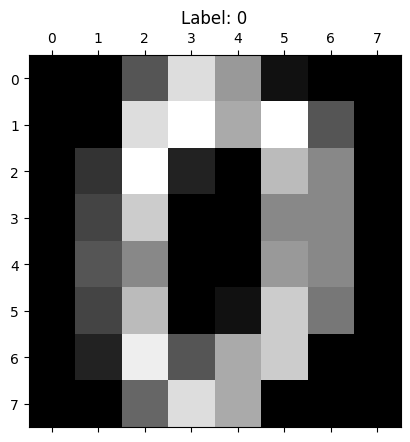

<Figure size 640x480 with 0 Axes>

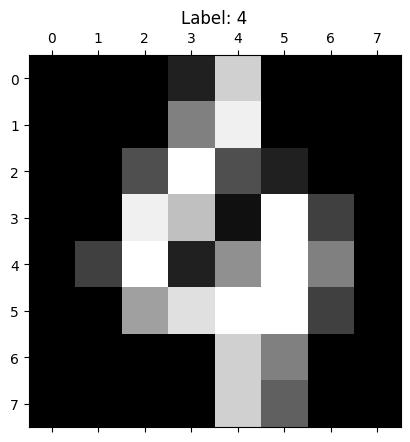

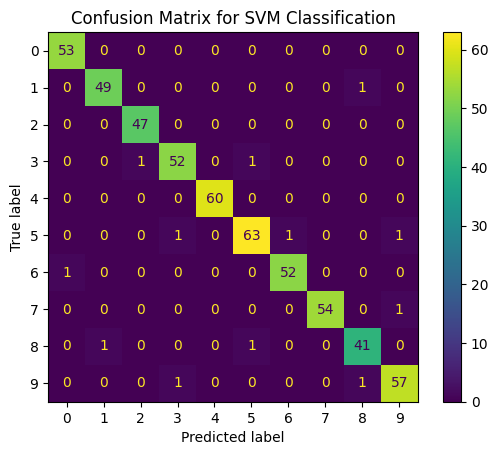


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Accuracy Score:
0.9777777777777777


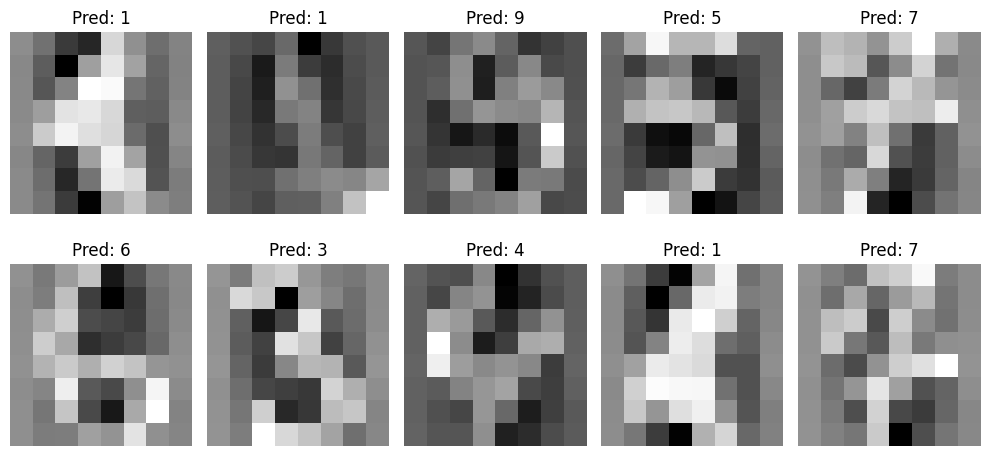

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Load the digits dataset
digits = datasets.load_digits()

# Display first and 101st images in grayscale
plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Label: {digits.target[0]}")
plt.show()

plt.gray()
plt.matshow(digits.images[100])
plt.title(f"Label: {digits.target[100]}")
plt.show()

# Prepare the data
X = digits.data
y = digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Compute the confusion matrix and display it
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot(cmap='viridis')
plt.title('Confusion Matrix for SVM Classification')
plt.show()

# Print classification report and accuracy score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Show 10 random digit predictions from the test set
plt.figure(figsize=(10, 5))  # Set up the figure size

# Loop to display 10 images
for i, index in enumerate(np.random.choice(len(X_test), 10, replace=False)):
    plt.subplot(2, 5, i + 1)  # Arrange 10 images in 2 rows, 5 columns
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')  # Show each image in grayscale
    plt.title(f'Pred: {y_pred[index]}')  # Show predicted digit above image
    plt.axis('off')  # Hide the x and y axes for a cleaner look

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()  # Display all 10 images


### What is Support Vector Machine (SVM)?

**Support Vector Machine (SVM)** is a supervised machine learning algorithm primarily used for classification, but it can also be used for regression. It aims to find the best hyperplane (a decision boundary) that separates data points of different classes in a high-dimensional space.

#### Key Concepts of SVM:

1. **Hyperplane**:
   - In the context of SVM, a **hyperplane** is a decision boundary that divides the data points of one class from those of another. In a 2-dimensional space, this would be a line, but in higher dimensions, it's referred to as a hyperplane.
   - The goal of SVM is to find the hyperplane that best separates the classes while maintaining the largest margin between them.

2. **Margin**:
   - The **margin** is the distance between the hyperplane and the nearest data points from each class. SVM aims to maximize this margin, as a larger margin is associated with a better generalization to unseen data.
   - The data points that are closest to the hyperplane are called **support vectors**, and these points are critical in defining the optimal hyperplane.

3. **Support Vectors**:
   - These are the data points that lie closest to the decision boundary (hyperplane). They are called "support vectors" because they support the decision boundary and are the most important data points in the model.

4. **Linear and Non-linear SVM**:
   - **Linear SVM**: In cases where the data is linearly separable (can be divided by a straight line or hyperplane), a linear SVM works well.
   - **Non-linear SVM**: If the data is not linearly separable, SVM uses a **kernel trick** to map the data into a higher-dimensional space where a linear hyperplane can be used to separate the classes. Common kernels include:
     - **Polynomial kernel**
     - **Radial Basis Function (RBF) kernel**
     - **Sigmoid kernel**

#### How Does SVM Work?

1. **Training**:
   - The SVM algorithm first identifies the hyperplane that best separates the two classes by maximizing the margin.
   - During the training process, the algorithm finds the support vectors (the data points closest to the hyperplane) and computes the decision boundary using these points.

2. **Prediction**:
   - For a new data point, the SVM predicts which class it belongs to by determining which side of the hyperplane the point lies on.
   - In the case of non-linear SVM, the kernel trick allows the algorithm to handle more complex boundaries.

---

### Why Use SVM?

Here are some reasons why SVM might be chosen for certain tasks:

1. **Effective in High-Dimensional Spaces**:
   - SVM performs well when the number of features (dimensionality) is high, which makes it particularly useful for text classification problems like **spam detection** or **document categorization**.

2. **Good Generalization**:
   - SVM is a powerful classifier that has the potential to generalize well, especially when the margin is maximized. This is important for making accurate predictions on unseen data.

3. **Robust to Overfitting**:
   - Because SVM focuses on maximizing the margin, it is less prone to overfitting, especially in high-dimensional spaces. The model tries to find a balance between fitting the training data and maintaining a large margin.

4. **Works Well with Clear Margin of Separation**:
   - SVM works best when there is a clear distinction between the classes (i.e., when the classes are linearly separable or nearly linearly separable).

5. **Can Handle Non-linear Data**:
   - SVM's ability to handle non-linear data via the kernel trick makes it a very versatile algorithm. By transforming the input data into a higher-dimensional space, SVM can still find a linear hyperplane even when the data is not linearly separable in the original space.

6. **Works Well with Small to Medium-Sized Datasets**:
   - SVMs can be computationally expensive and may not scale well to very large datasets. However, they perform well on small-to-medium-sized datasets.

---

### Why Not Use SVM?

While SVM has many advantages, it also has some limitations:

1. **Computational Complexity**:
   - SVM can be slow and computationally expensive, particularly for large datasets, because it requires calculating the distances between all points in the training data.

2. **Memory Usage**:
   - Since SVM requires storing the support vectors, it can be memory-intensive, especially for large datasets.

3. **Choice of Kernel**:
   - Selecting the right kernel and tuning the hyperparameters (such as the **C** parameter, which controls the margin size) can be challenging and require experimentation or cross-validation.

4. **Sensitive to Noisy Data**:
   - SVMs can be sensitive to noisy data, especially if there are many outliers. This can make the algorithm less robust in situations where the data contains mislabeled points or noise.

5. **Not Ideal for Large Datasets**:
   - For very large datasets, other algorithms like **Random Forest** or **Gradient Boosting Machines** may perform better because SVMs can take a long time to train.

---

### When to Use SVM?

You might choose SVM for the following reasons:
- **When you have high-dimensional data** (e.g., text data, gene data, etc.).
- **When the data is linearly separable** or nearly so, and you want a robust model.
- **When you are looking for high accuracy** and generalization, especially in binary classification tasks.
- **When you need a model that works well with both linear and non-linear data**, thanks to the kernel trick

### Explanation of the Code

This code implements a machine learning model to classify handwritten digits from the popular **Digits Dataset** using a **Support Vector Machine (SVM)**. Below is a step-by-step explanation of what each part of the code does:

1. **Importing Libraries**:
   - The required libraries for data visualization, data handling, and machine learning tasks are imported. These include libraries for plotting (matplotlib), handling datasets (sklearn), and for the SVM classifier (sklearn).

2. **Loading the Digits Dataset**:
   - The **Digits Dataset** from `sklearn.datasets` is loaded. This dataset contains 8x8 pixel images of handwritten digits (0–9), where each image is a flattened 64-dimensional feature vector.

3. **Displaying Some Images**:
   - The first and 101st images from the dataset are displayed. The images are shown in grayscale, and the actual label of each image is shown as the title. This helps visualize what the dataset looks like and what the model is going to work with.

4. **Preparing the Data**:
   - The image data (`X`) and the labels (`y`) are extracted from the dataset. `X` represents the features (pixel values of each image), while `y` represents the true labels (the actual digit corresponding to each image).
   
5. **Splitting the Data**:
   - The data is split into two parts: a **training set** (used to train the model) and a **test set** (used to evaluate the model's performance). This is done using the `train_test_split` function, and the test set is 30% of the total data.

6. **Scaling the Features**:
   - Since SVM performs better when the data is scaled, the features are standardized using `StandardScaler`. This scales each feature to have a mean of 0 and a standard deviation of 1, making the model more efficient.

7. **Training the SVM Model**:
   - An **SVM classifier** with a **linear kernel** is created and trained on the scaled training data. The SVM model is a powerful classifier that finds an optimal hyperplane to separate different classes (digits in this case).

8. **Making Predictions**:
   - Once the model is trained, it is used to make predictions on the test set. The predicted labels are compared with the true labels to evaluate the model's performance.

9. **Evaluating the Model**:
   - The model's performance is assessed using various metrics:
     - A **confusion matrix** is displayed, which shows how well the model classified each digit (i.e., the true vs predicted classes).
     - A **classification report** is printed, which includes precision, recall, and F1 score for each class (digit 0–9).
     - The **accuracy score** gives the percentage of correct predictions made by the model.

10. **Visualizing Random Predictions**:
   - Finally, 10 random images from the test set are selected and displayed. Each image is shown with its predicted label. This visualization helps verify how well the model is performing on unseen data.

### In Summary:
The code loads a dataset of handwritten digits, splits the data into training and testing sets, scales the data, trains an SVM model, and then evaluates the model using various metrics like accuracy and confusion matrix. It also includes visualizations of both the input images and the predictions made by the model. This provides a comprehensive approach to image classification using SVM.